<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayeseana_Com_RSTAN/blob/main/Atividade_Analise_Bayseana_Com_RSTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjundo de dados de confiabilidade de motores

Tutorial de referencia: https://ourcodingclub.github.io/tutorials/stan-intro/

Bayesian Model with RStan: https://www.kaggle.com/code/dhafer/bayesian-model-with-rstan


Fonte dos dados: https://www.kaggle.com/datasets/eduardopoleze/parmetros-operacionais-bombamotor-eltrico

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN

Poisson regression in Stan: https://rpubs.com/kaz_yos/stan-pois1

 Discoveries data revisited: https://study.sagepub.com/sites/default/files/chapter16.pdf

Beginners Exercise: Bayesian computation with Stan and Farmer Jöns: https://www.sumsar.net/files/posts/2017-01-15-bayesian-computation-with-stan-and-farmer-jons/stan_exercise.html


https://mc-stan.org/

http://mc-stan.org/bayesplot/

https://mc-stan.org/rstanarm/articles/rstanarm.html



In [1]:
!pip install rpy2==3.5.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%load_ext rpy2.ipython

In [3]:
# Change 2 to however many cores you can/want to use to parallelize install
# If you experience crashes or run out RAM during installation, try changing this to 1
%%R
Sys.setenv(MAKEFLAGS = "-j2")
Sys.setenv("R_REMOTES_NO_ERRORS_FROM_WARNINGS" = "true")
remotes::install_github("stan-dev/rstanarm", INSTALL_opts = "--no-multiarch", force = TRUE)

In [ ]:
%%R
install.packages("gdata")

In [ ]:
%%R
library(rstan) # observe startup messages
library(bayesplot)
library(ggplot2)
library(dplyr)
library(magrittr)
library(gdata)

In [6]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Motor_Bomba_1.csv", header = TRUE, sep = ";", dec = ",")
head(df)

   Ano Dia Temp..Estator.Fase.U Temp..Estator.Fase.V Temp..Estator.Fase.WA
1 2016   1             38.13657             39.87268              36.57407
2 2016   2             38.13657             39.87268              36.57407
3 2016   3             38.13657             39.87268              36.57407
4 2016   4             38.02083             39.75694              36.51620
5 2016   5             38.02083             39.75694              36.51620
6 2016   6             37.96296             39.69907              36.51620
  Temp..Estator.Fase.WB Vibração.Bomba.LA Vazão.Bomba Corrente Pressão.Desc.
1              38.77315        0.00000000           0        0     0.2025463
2              38.77315        0.00000000           0        0     0.2025463
3              38.77315        0.03674769           0        0     0.2025463
4              38.71528        0.00000000           0        0     0.2025463
5              38.71528        0.00000000           0        0     0.2025463
6            

In [7]:
%%R
names(df)

 [1] "Ano"                             "Dia"                            
 [3] "Temp..Estator.Fase.U"            "Temp..Estator.Fase.V"           
 [5] "Temp..Estator.Fase.WA"           "Temp..Estator.Fase.WB"          
 [7] "Vibração.Bomba.LA"               "Vazão.Bomba"                    
 [9] "Corrente"                        "Pressão.Desc."                  
[11] "Pressão.Suc"                     "Posição.FCV"                    
[13] "Temp..externo.mancal.escora.LNA" "Temp..interno.mancal.escora.LNA"
[15] "Pressão.Selo.LA"                 "Pressão.Selo.LNA"               
[17] "Temp..mancal.LA.bomba"           "Temp..mancal.LA.motor"          
[19] "Temp..mancal.LNA.bomba"          "Temp..mancal.LNA.motor"         
[21] "Temp..Oleo.ULF"                 


In [8]:
%%R
str(df)

'data.frame':	365 obs. of  21 variables:
 $ Ano                            : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Dia                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Temp..Estator.Fase.U           : num  38.1 38.1 38.1 38 38 ...
 $ Temp..Estator.Fase.V           : num  39.9 39.9 39.9 39.8 39.8 ...
 $ Temp..Estator.Fase.WA          : num  36.6 36.6 36.6 36.5 36.5 ...
 $ Temp..Estator.Fase.WB          : num  38.8 38.8 38.8 38.7 38.7 ...
 $ Vibração.Bomba.LA              : num  0 0 0.0367 0 0 ...
 $ Vazão.Bomba                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Corrente                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Desc.                  : num  0.203 0.203 0.203 0.203 0.203 ...
 $ Pressão.Suc                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Posição.FCV                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Temp..externo.mancal.escora.LNA: num  20.7 20.7 20.7 20.7 20.7 ...
 $ Temp..interno.mancal.escora.LNA: num  21 21 21 21 20.9

In [9]:
%%R
lm1 <- lm(Temp..mancal.LA.motor ~ Dia, data = df)
summary(lm1)


Call:
lm(formula = Temp..mancal.LA.motor ~ Dia, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6134 -3.1472  0.3514  3.8893  5.5081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.124734   0.434141   55.57   <2e-16 ***
Dia          0.062544   0.002056   30.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.139 on 363 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.7175 
F-statistic: 925.5 on 1 and 363 DF,  p-value: < 2.2e-16



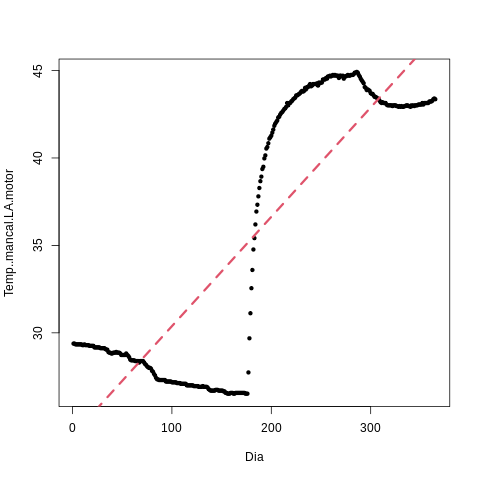

In [10]:
%%R
plot(Temp..mancal.LA.motor ~ Dia, pch = 20, data = df)
abline(lm1, col = 2, lty = 2, lw = 3)

In [11]:
%%R
x <- I(df$Dia - 01)
y <- df$Temp..mancal.LA.motor
N <- length(df$Dia)

In [12]:
%%R
lm1 <- lm(y ~ x)
summary(lm1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6134 -3.1472  0.3514  3.8893  5.5081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.187279   0.432361   55.94   <2e-16 ***
x            0.062544   0.002056   30.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.139 on 363 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.7175 
F-statistic: 925.5 on 1 and 363 DF,  p-value: < 2.2e-16



In [13]:
%%R
lm_alpha <- summary(lm1)$coeff[1]  # the intercept
lm_beta <- summary(lm1)$coeff[2]  # the slope
lm_sigma <- sigma(lm1)  # the residual error

In [14]:
%%R
stan_data <- list(N = N, x = x, y = y)

In [15]:
%%R
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size
 vector[N] x; // Predictor
 vector[N] y; // Outcome
}

parameters {
 real alpha; // Intercept
 real beta; // Slope (regression coefficients)
 real < lower = 0 > sigma; // Error SD
}

model {
 y ~ normal(alpha + x * beta , sigma);
}

generated quantities {
} // The posterior predictive distribution",

"stan_model1.stan")

In [16]:
%%R
stanc("stan_model1.stan")

$status
[1] TRUE

$model_cppname
[1] "model6237aa1e5f4_stan_model1"

$cppcode
[1] "// Code generated by Stan version 2.21.0\n\n#include <stan/model/model_header.hpp>\n\nnamespace model6237aa1e5f4_stan_model1_namespace {\n\nusing std::istream;\nusing std::string;\nusing std::stringstream;\nusing std::vector;\nusing stan::io::dump;\nusing stan::math::lgamma;\nusing stan::model::prob_grad;\nusing namespace stan::math;\n\nstatic int current_statement_begin__;\n\nstan::io::program_reader prog_reader__() {\n    stan::io::program_reader reader;\n    reader.add_event(0, 0, \"start\", \"model6237aa1e5f4_stan_model1\");\n    reader.add_event(22, 20, \"end\", \"model6237aa1e5f4_stan_model1\");\n    return reader;\n}\n\nclass model6237aa1e5f4_stan_model1\n  : public stan::model::model_base_crtp<model6237aa1e5f4_stan_model1> {\nprivate:\n        int N;\n        vector_d x;\n        vector_d y;\npublic:\n    model6237aa1e5f4_stan_model1(stan::io::var_context& context__,\n        std::ostream* pstrea

In [17]:
%%R
stan_model1 <- "stan_model1.stan"

In [18]:
%%R
fit <- stan(file = stan_model1, data = stan_data, warmup = 500, iter = 1000, chains = 4, cores = 2, thin = 1)

In [19]:
%%R
fit

Inference for Stan model: stan_model1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha   24.16    0.02 0.45   23.26   23.86   24.17   24.47   25.01   794    1
beta     0.06    0.00 0.00    0.06    0.06    0.06    0.06    0.07   885    1
sigma    4.16    0.00 0.16    3.86    4.05    4.15    4.26    4.48  1044    1
lp__  -700.07    0.05 1.30 -703.29 -700.60 -699.73 -699.15 -698.62   588    1

Samples were drawn using NUTS(diag_e) at Wed Nov  2 20:01:34 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [20]:
%%R
posterior <- extract(fit)
str(posterior)


Error in extract(fit) : object of type 'S4' is not subsettable


RInterpreterError: ignored

In [ ]:
%%R
glm1 <- glm(formula = Ano ~ Dia + Temp..Estator.Fase.U + Temp..Estator.Fase.WA + offset(log(Temp..Oleo.ULF)),
            family = poisson(link = "log"),
            data = df)
summary(glm1)